# Box Plot

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
![ ! -f "./lung-cancer/lung-cancer.data" ] && git clone "https://gist.github.com/1fb09cfe3e8083958764e46ef7e0f83f.git" ./lung-cancer/

Cloning into './lung-cancer'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
cancer = pd.read_csv("./lung-cancer/smoking.txt", header=12, sep=' ')

In [4]:
cancer.sample(10)

,STATE,CIG,BLAD,LUNG,KID,LEUK
26,NM,21.16,2.90,14.59,2.52,5.95
5,DE,33.60,4.78,24.55,3.36,6.45
21,MO,27.56,4.04,20.98,2.55,6.82
0,AL,18.20,2.90,17.05,1.59,6.15
27,NY,29.14,5.30,25.02,3.10,7.23
31,PE,23.78,4.89,12.11,2.75,6.83
2,AR,18.24,2.99,15.98,2.02,6.94
37,UT,14.00,3.31,12.01,2.20,6.71
7,FL,28.27,4.46,23.57,2.41,6.07
6,DC,40.46,5.60,27.27,3.13,7.08


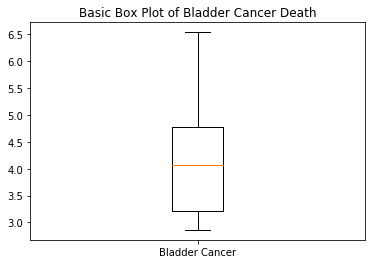

In [5]:
blad_data = cancer["BLAD"]
bladder_cancer_box, ax1 = plt.subplots()
ax1.set_title('Basic Box Plot of Bladder Cancer Death')
ax1.boxplot(blad_data, labels=['Bladder Cancer'])
plt.show()

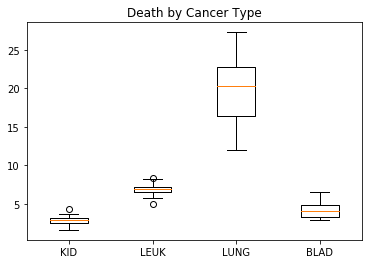

In [6]:
kid_data = cancer["KID"]
leuk_data = cancer["LEUK"]
lung_data = cancer["LUNG"]

cancer_type_box, ax2 = plt.subplots()
ax2.set_title('Death by Cancer Type')
ax2.boxplot([kid_data, leuk_data, lung_data, blad_data], labels=["KID","LEUK","LUNG","BLAD"])
plt.show()

# Plot Time-Series Data: Stock Prices

In [7]:
![ ! -f "./stock/stock.csv" ] && git clone "https://gist.github.com/806e0268d3d529ac337250326dd09a9a.git" ./stock/

Cloning into './stock'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [8]:
stock = pd.read_csv("./stock/stock.csv")

In [9]:
stock

,Date,KO,DUK,BRK-A
0,2019-08-12,51.498680,85.755882,298001
1,2019-08-13,51.789082,86.062485,299510
2,2019-08-14,51.295395,85.094742,295000
3,2019-08-15,52.147247,86.465134,298067
4,2019-08-16,52.669979,86.939674,300555
...,...,...,...,...
247,2020-08-04,46.689999,84.690002,300330
248,2020-08-05,47.220001,83.510002,305200
249,2020-08-06,47.480000,84.209999,307455
250,2020-08-07,47.799999,86.610001,314334


Text(0.5, 1.0, 'Daily stock prices 2019-08-12:2020-08-10: KO and BRK-A')

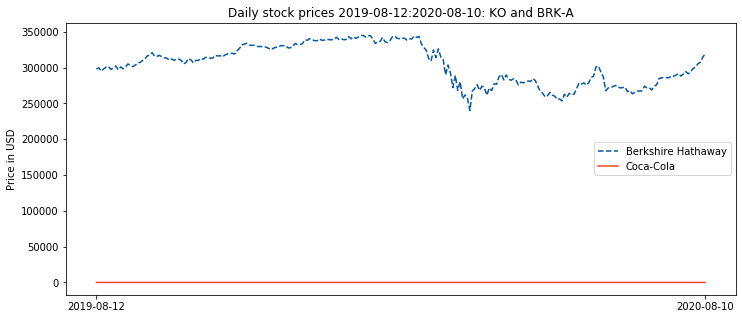

In [10]:
plt.figure(figsize=(12,5))
plt.plot(stock["BRK-A"], color="#0455A4", linestyle="--", label='Berkshire Hathaway')
plt.plot(stock["KO"], color="#E84A27", linestyle="-", label='Coca-Cola')
plt.legend()
plt.xticks([0, 251], ["2019-08-12", "2020-08-10"])
plt.ylabel("Price in USD")
plt.title("Daily stock prices 2019-08-12:2020-08-10: KO and BRK-A")

In [11]:
stock_data_standardized = stock.copy()
stock_data_standardized["BRK-A"] = (stock["BRK-A"] - stock["BRK-A"].mean()) / stock["BRK-A"].std(ddof=0)
stock_data_standardized["KO"] = (stock["KO"] - stock["KO"].mean()) / stock["KO"].std(ddof=0)
stock_data_standardized["DUK"] = (stock["DUK"] - stock["DUK"].mean()) / stock["DUK"].std(ddof=0)

Text(0.5, 1.0, 'Standardized Daily stock prices 2019-08-12:2020-08-10: KO and BRK-A')

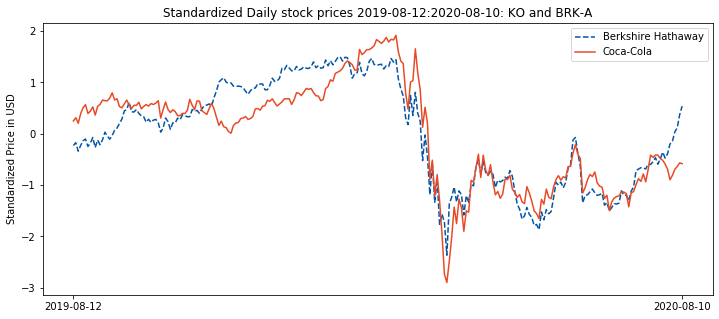

In [12]:
plt.figure(figsize=(12,5))
plt.plot(stock_data_standardized["BRK-A"], color="#0455A4", linestyle="--", label='Berkshire Hathaway')
plt.plot(stock_data_standardized["KO"], color="#E84A27", linestyle="-", label='Coca-Cola')
plt.legend()
plt.xticks([0, 251], ["2019-08-12", "2020-08-10"])
plt.ylabel("Standardized Price in USD")
plt.title("Standardized Daily stock prices 2019-08-12:2020-08-10: KO and BRK-A")

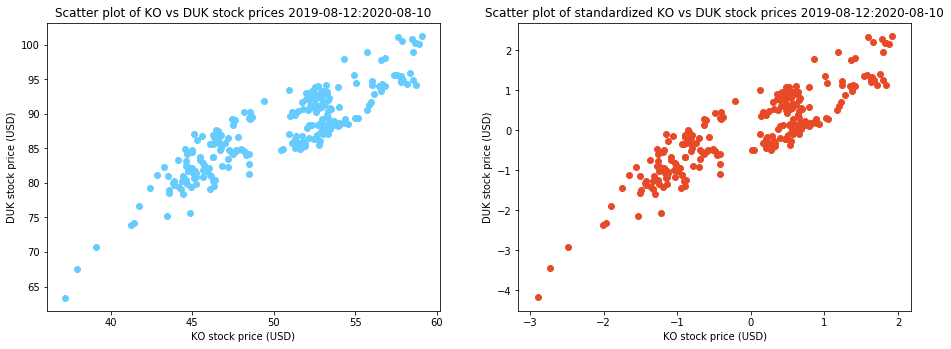

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(stock["KO"], stock["DUK"], color="#66CCFF")
plt.title("Scatter plot of KO vs DUK stock prices 2019-08-12:2020-08-10")
plt.xlabel("KO stock price (USD)")
plt.ylabel("DUK stock price (USD)")
plt.subplot(1, 2, 2)
plt.scatter(stock_data_standardized["KO"], stock_data_standardized["DUK"], color="#E84A27")
plt.title("Scatter plot of standardized KO vs DUK stock prices 2019-08-12:2020-08-10")
plt.xlabel("KO stock price (USD)")
plt.ylabel("DUK stock price (USD)")
plt.subplots_adjust(bottom=0, top=1, left=-0.5, right=1.5)

In [14]:
stock.corr()

,KO,DUK,BRK-A
KO,1.000000,0.883427,0.90837
DUK,0.883427,1.000000,0.72211
BRK-A,0.908370,0.722110,1.00000
